In [3]:
# Week 2 - ML Model for EV Dataset

# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
# Loading Dataset
url = "https://www.kaggle.com/datasets/urvishahir/electric-vehicle-specifications-dataset-2025"

In [14]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivanichandrol","key":"24211e653bfb8b41f99ff502f9a00c80"}'}

In [26]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d urvishahir/electric-vehicle-specifications-dataset-2025
!unzip -o electric-vehicle-specifications-dataset-2025.zip
df = pd.read_csv("electric_vehicles_spec_2025.csv.csv")
df.head()


Dataset URL: https://www.kaggle.com/datasets/urvishahir/electric-vehicle-specifications-dataset-2025
License(s): Attribution 4.0 International (CC BY 4.0)
electric-vehicle-specifications-dataset-2025.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  electric-vehicle-specifications-dataset-2025.zip
  inflating: electric_vehicles_spec_2025.csv.csv  


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [27]:
# Checking Data
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


In [28]:
# Handle Missing Values (if any)
df = df.dropna()

In [31]:
# Feature Selection
X = df[['battery_capacity_kWh', 'torque_nm']]  # Corrected features
y = df['range_km']  # Corrected target variable

In [33]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Build Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [36]:
# Evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 32.805941046787694
RMSE: 40.51144350870048
R² Score: 0.8250073982489379


In [37]:
# Show Feature Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
battery_capacity_kWh,4.470473
torque_nm,0.002390


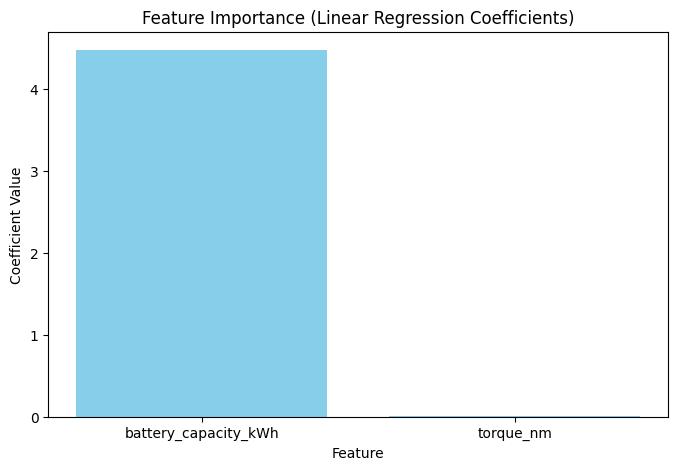

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.show()


In [48]:
# Predicting EV range for a sample input
sample_data = [[70, 400]]  # [Battery Capacity (kWh), Torque (Nm)]
sample_df = pd.DataFrame(sample_data, columns=['battery_capacity_kWh', 'torque_nm'])
predicted_range = model.predict(sample_df)
print(f"Predicted EV Range: {predicted_range[0]:.2f} km")

Predicted EV Range: 375.50 km
